###############################1) Temporal Analysis ###########################################################


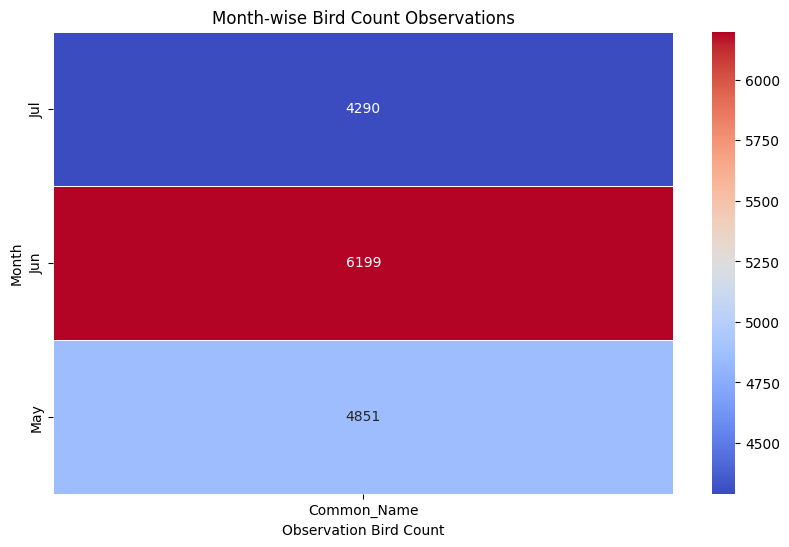

Analysis:
 More species are observed only in specific season (Jun) may be that season is more suitable for their highlighting migration

                        Time_Range  BirdsPresent_count
0      5:00 - 6:00 AM (Early Dawn)                1285
1         6:00 - 7:00 AM (Sunrise)                3832
2    7:00 - 8:00 AM (Morning Rise)                4007
3  8:00 - 9:00 AM (Active Morning)                3188
4   9:00 - 10:00 AM (Late Morning)                3028


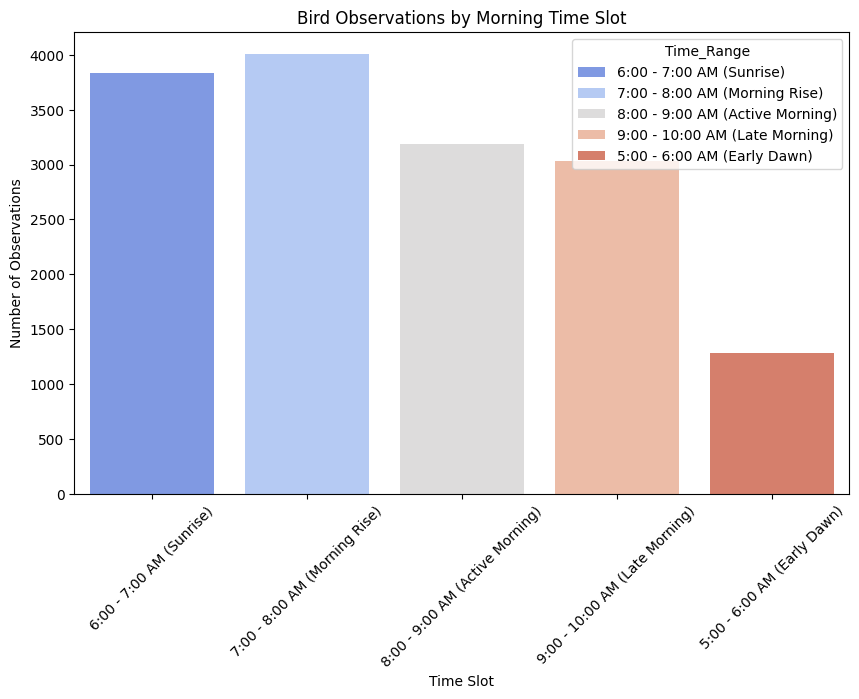

Observation Time Analysis :
Peak bird activity occurs between 6:00 - 8:00 AM (Sunrise & Morning Rise).
Fewer observations in the early dawn (5:00 - 6:00 AM) and late morning (9:00 - 10:00 AM).

###############################2) Spatial Analysis ###########################################################
  Location_Type  Common_Name
0        Forest         8533
1     Grassland         6807


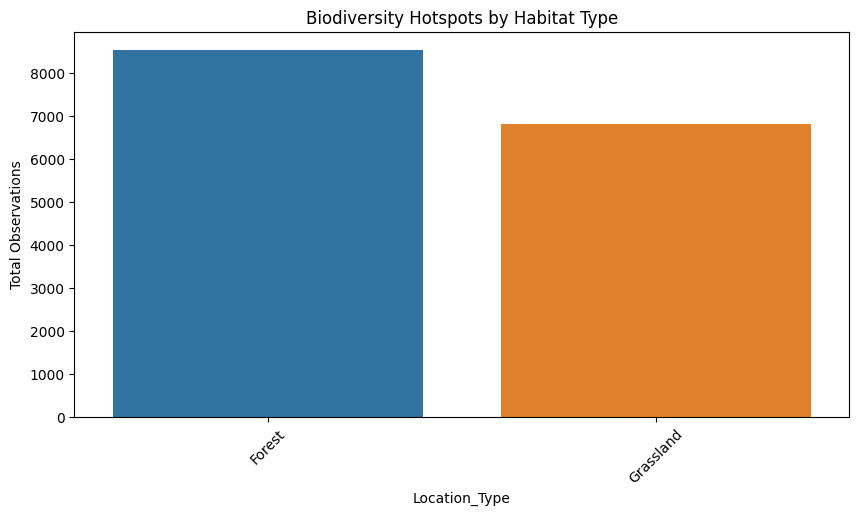

 Spatial Distribution of Bird Observations:
 High bird activity recorded in  forest Compared to the grassland sites.

+-----+-------------+-----------------+------------------------+
|     | Plot Name   | Location Type   |   Unique Species Count |
+=====+=============+=================+========================+
|   0 | ANTI-0007   | Grassland       |                     23 |
+-----+-------------+-----------------+------------------------+
|   1 | ANTI-0008   | Grassland       |                     20 |
+-----+-------------+-----------------+------------------------+
|   2 | ANTI-0009   | Grassland       |                     25 |
+-----+-------------+-----------------+------------------------+
|   3 | ANTI-0015   | Grassland       |                     22 |
+-----+-------------+-----------------+------------------------+
|   4 | ANTI-0016   | Grassland       |                     24 |
+-----+-------------+-----------------+------------------------+
|   5 | ANTI-0017   | Grassland      

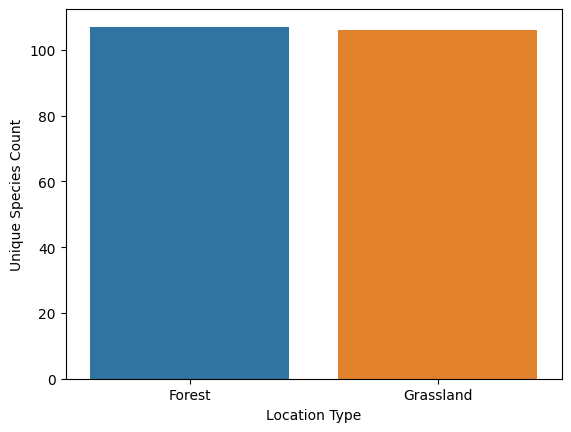

 Species Diversity Across Habitats:
 Forest and Grassland have nearly equal unique species counts.
 Both ecosystems support a rich variety of bird species.



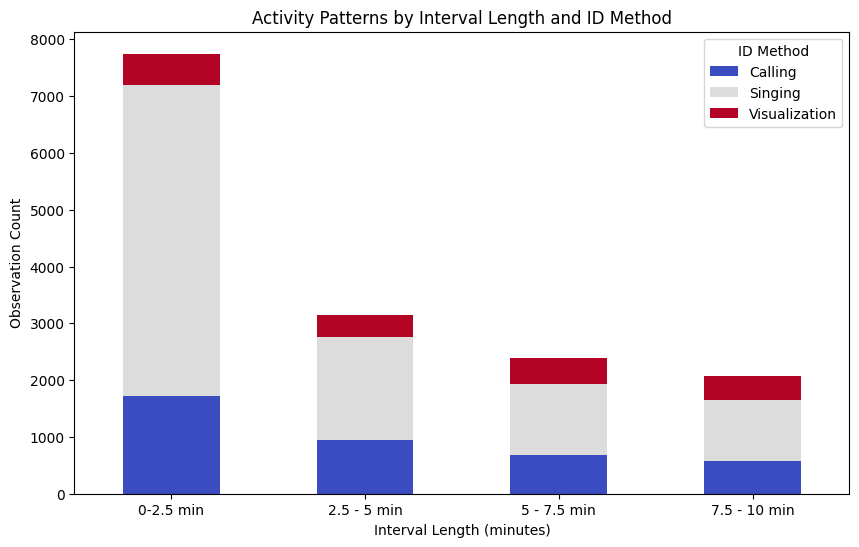

 Activity Patterns by Interval Length:
 Most bird observations occur within the first 2.5 minutes.
 Singing is the dominant identification method across all intervals. Calling and visualization contribute less but remain consistent over time.

Sex                    Female  Male
Scientific_Name                    
Agelaius phoeniceus        18   181
Branta canadensis           1     2
Cardinalis cardinalis      20    69
Carduelis tristis          18    47
Geothlypis trichas          1    99
Guiraca caerulea            1    14
Hirundo rustica             1     5
Icterus galbula             2     8
Icterus spurius             1    10
Melanerpes carolinus        2     3
Molothrus ater             18    94
Passerina cyanea            6   450
Quiscalus quiscula          1     3
Sialia sialis              24    36
Sturnella magna             5   148
Tachycineta bicolor         3     5
Turdus migratorius          2    81


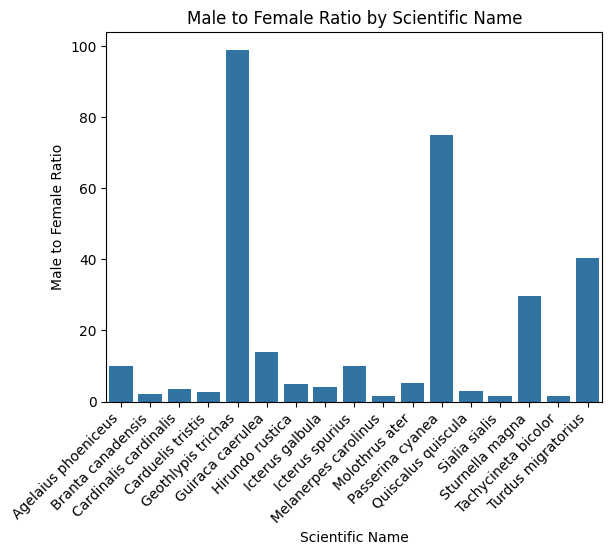

Sex Ratio Insights :
 Hirundo rustica and Quiscalus quiscula show extremely high male-to-female ratios.
Turdus migratorius and Sturnella magna also exhibit significantly skewed male-to-female

############################### 4) Enivronmental  Conditions ###########################################################


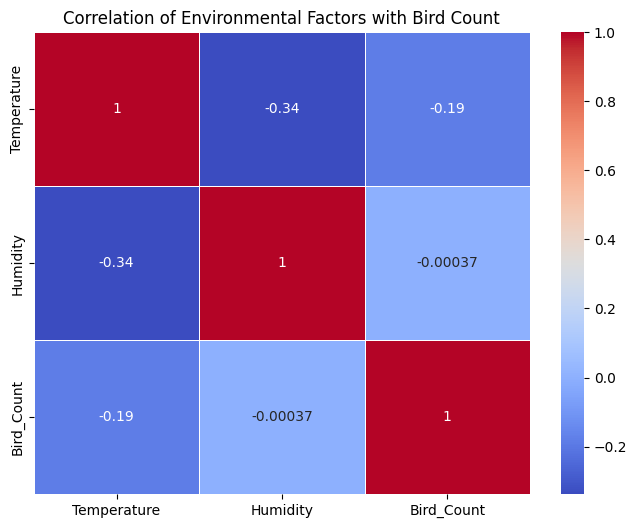

Weather Correlation Insights 

                  Temperature has a small negative impact on bird Observation count (but not a strong factor).
                  Humidity does not significantly affect bird count.
                  Temperature and humidity are somewhat inversely related.
                  



<Figure size 1200x600 with 0 Axes>

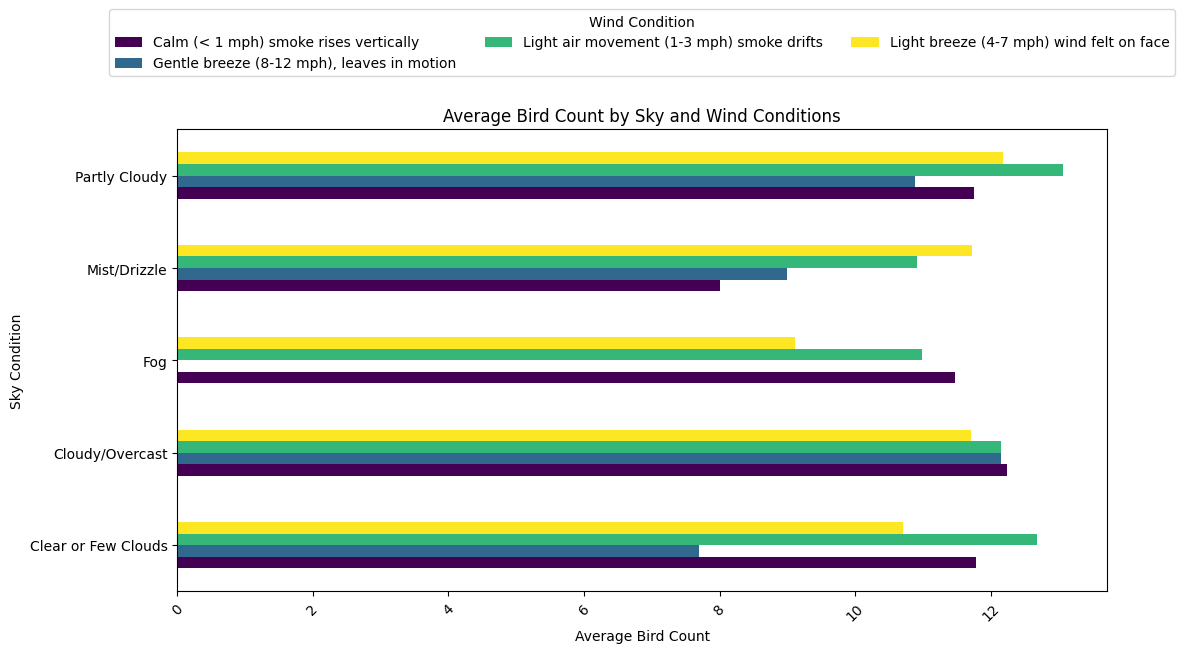

More birds observed in partly cloudy and cloudy/overcast conditions.
Light breeze (4-7 mph) favors higher bird counts.
Fog and mist reduce bird observations.
Birds may prefer mild wind and moderate lighting for activity.

                Disturbance  Total Birds Sightings
0        No effect on count                   7513
1    Slight effect on count                   5826
2  Moderate effect on count                   1573
3   Serious effect on count                    428


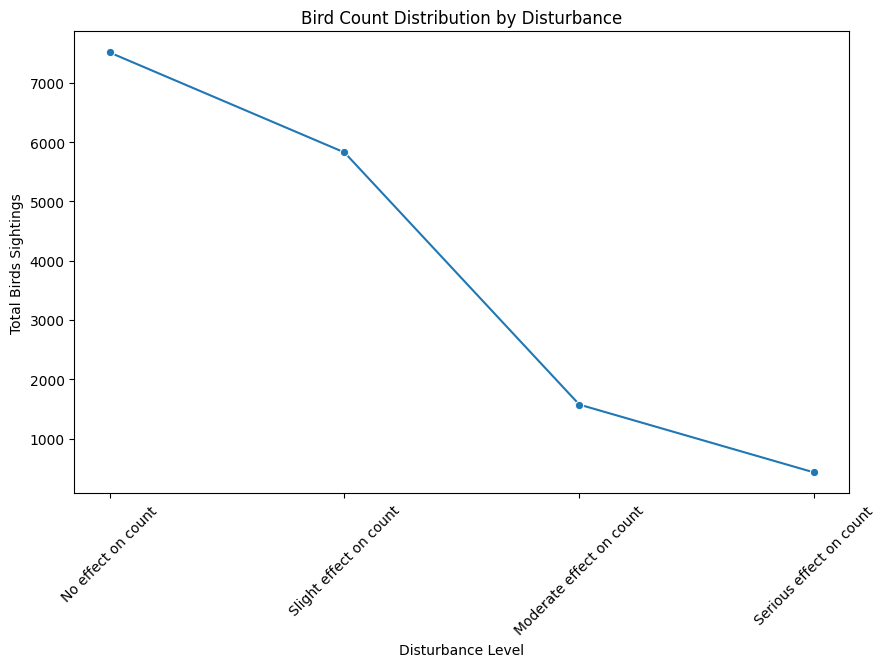

Disturbance Insights
We can clearly see that when there is no disturbance, more bird observations are recorded. However, as disturbance levels vary, bird sightings tend to decrease.

############################### 5) Distance and Behaviour   ###########################################################


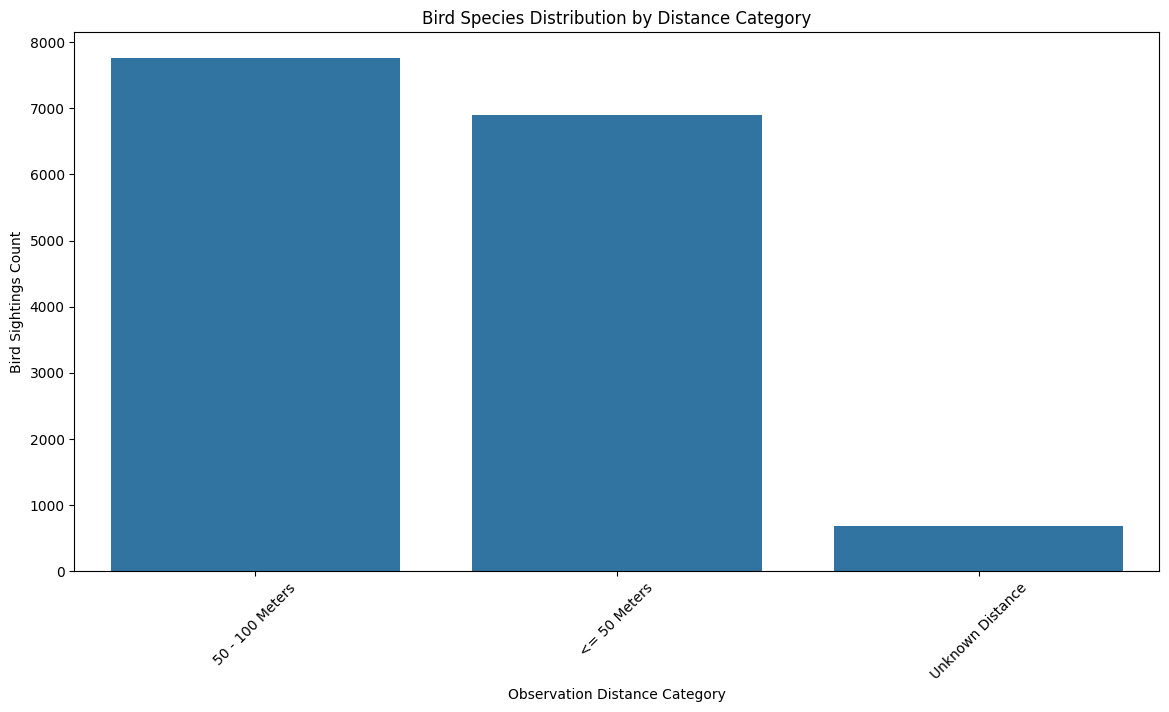

Distance&Behaviour Insights
Most bird sightings occur within 50-100 meters.
Slightly fewer birds observed within 50 meters.
Very few sightings recorded with unknown distance.



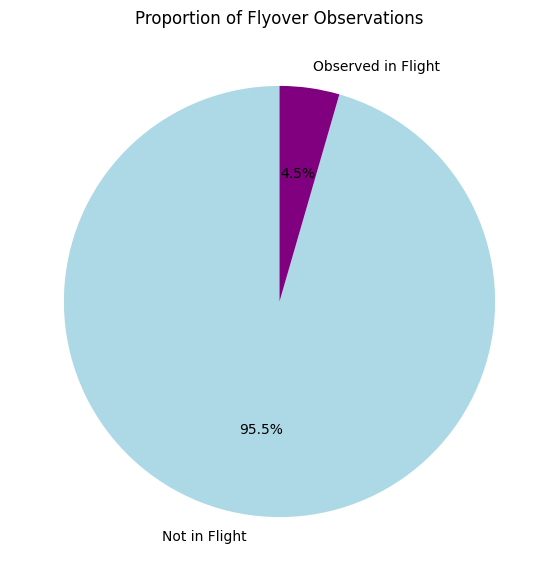

 FlyOver Observer Insights
Only 4.5% of bird observations were in flight, while most were stationary.

############################### 6) Observer Trends   ###########################################################


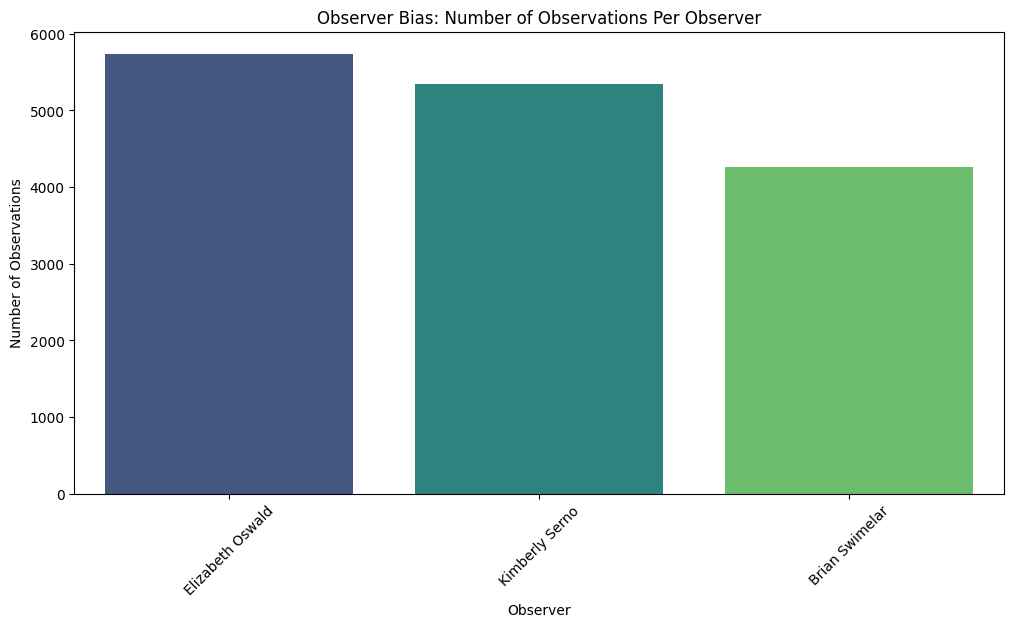

Observer Insights 
Elizabeth Oswald recorded the highest number of observations, followed by Kimberly Serno and Brian Swimelar.

#Visit Analysis


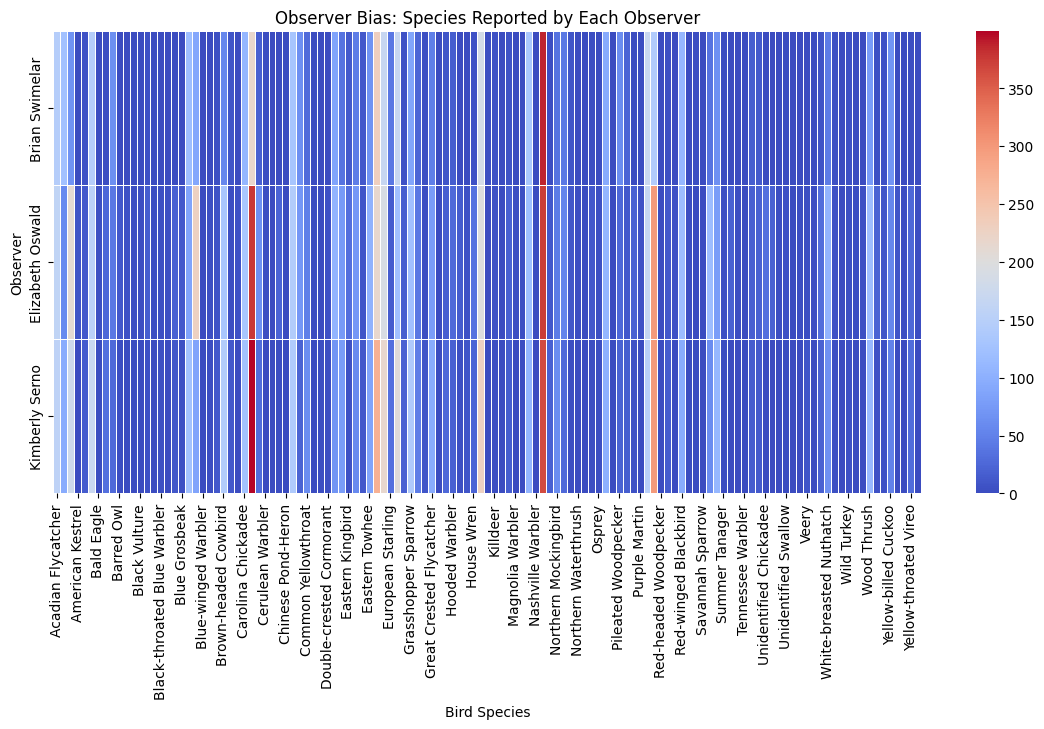

Insights from Observer Bias Heatmap:
- Different Observers, Different Counts: Some observers reported more bird species than others.
- Some Species Were Observed More Often: Birds like Brown-headed Cowbird and Northern Mockingbird were reported frequently.
- Most Species Had Similar Reports: Many species had nearly the same number of observations across all observers.
- Possible Observer Bias: Some observers might be better at spotting certain birds, leading to variation in species counts.

############################### 6) Conservation Insights   ###########################################################


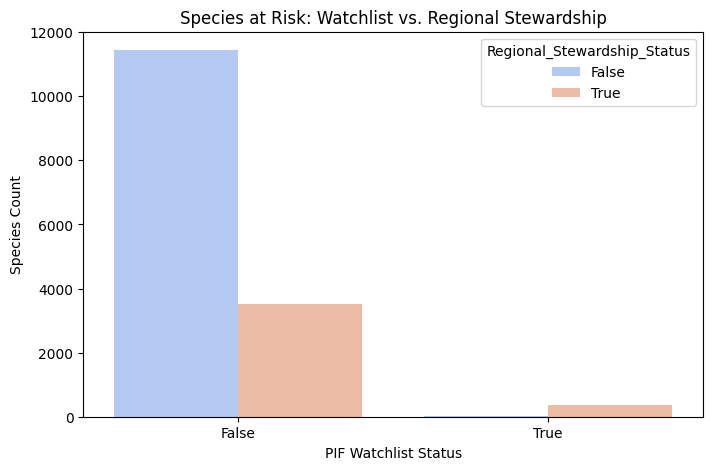

Consversation Insights using CountPlot
Most observed species are not at risk (not on the Watchlist). However, some species still require regional conservation efforts even if they are not on the Watchlist.


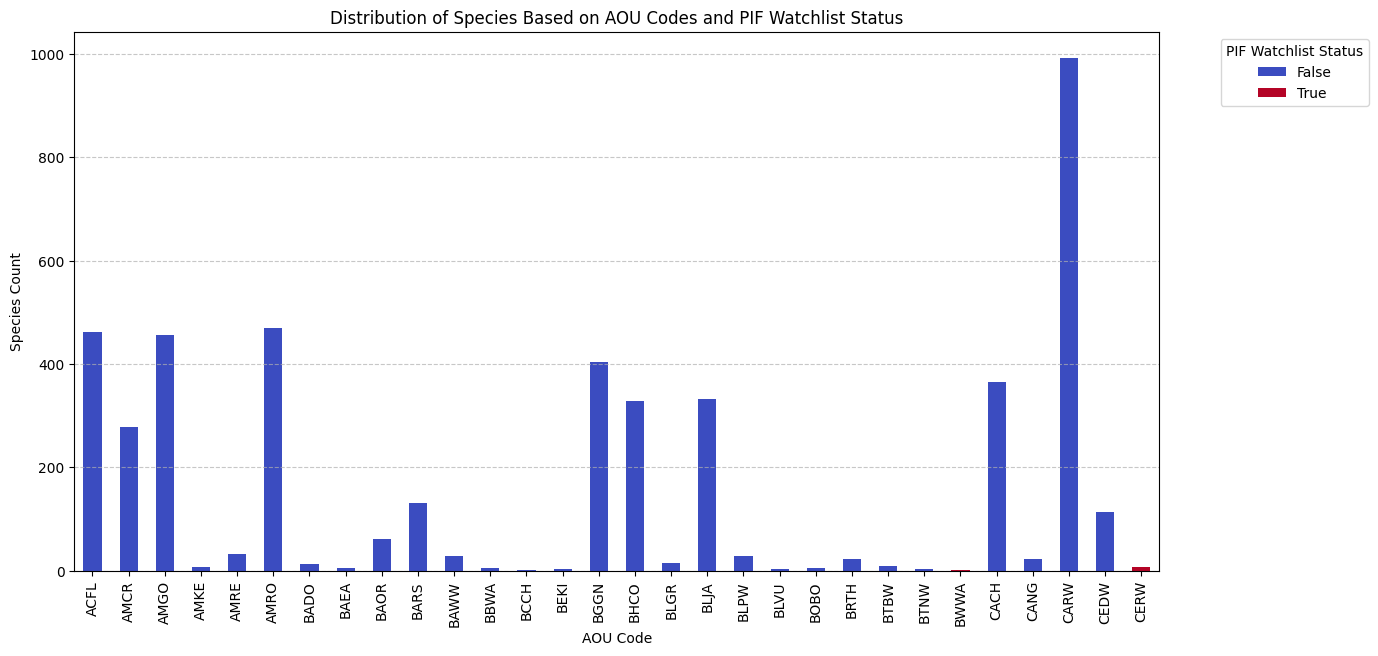

Aou Code Insights 
Top 30 species show varied distribution in observations.
A few species have significantly higher counts.
Most species in the top 30 are not on the PIF Watchlist.


In [ ]:
import pandas as pd 
import mysql.connector
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import time,datetime
import re
from tabulate import tabulate
import numpy as np


def LoadingAndStoring(filename1,filename2):
    #Loading the data from Excel 
    ForestExceldata=pd.ExcelFile(filename1)
    GrassLandExcelData=pd.ExcelFile(filename2)
    #Filtered Column that are needed for overall analysis 
    relevantcolumns=['Admin_Unit_Code','Sub_Unit_Code','Plot_Name','Location_Type','Year','Date','Start_Time','End_Time','Observer','Visit','Interval_Length','ID_Method','Distance', 'Flyover_Observed','Sex','Common_Name','AcceptedTSN','Scientific_Name','AOU_Code'  ,'PIF_Watchlist_Status' , 'Regional_Stewardship_Status'  ,'Temperature',  'Humidity' , 'Sky'  ,'Wind' , 'Disturbance','Initial_Three_Min_Cnt' ]
    df1=[ForestExceldata.parse(sheet,usecols=relevantcolumns
                               ) for sheet in ForestExceldata.sheet_names]
    df2=[GrassLandExcelData.parse(sheet,usecols=relevantcolumns
                           ) for sheet in GrassLandExcelData.sheet_names  if not GrassLandExcelData.parse(sheet).empty ]

    combineddf=pd.concat(df1+df2,ignore_index=True)
    #Stroing combined data into one excel
    combineddf.to_excel('ForestGrasslandData.xlsx',index=False)
    ForestGrasslanddata=pd.ExcelFile('ForestGrasslandData.xlsx')

    BirdAnalysisdf=ForestGrasslanddata.parse()
    return BirdAnalysisdf

#Data Preprocessing 

def CleaningAndPreprocessing(BirdAnalysisdf):


    # Step 1 Checking Missing Values and Filling 
    print(BirdAnalysisdf.isnull().sum())
    BirdAnalysisdf['ID_Method']=BirdAnalysisdf['ID_Method'].fillna(BirdAnalysisdf['ID_Method'].mode()[0])
    BirdAnalysisdf['Distance']=BirdAnalysisdf['Distance'].fillna('Unknown Distance')
    # Dropping the column
    BirdAnalysisdf.drop('Sub_Unit_Code',axis=1,inplace=True)
    print("Afterfilling with mostfrequent and also removing columnn method:",BirdAnalysisdf.isnull().sum())
    print('Most Frequent : ',BirdAnalysisdf['Sex'].mode()[0])
    BirdAnalysisdf['Sex']=BirdAnalysisdf['Sex'].fillna('Undetermined')

    #Removing  the null values in the AcceptedTSN 
    BirdAnalysisdf.dropna(subset=['AcceptedTSN'], axis=0, inplace=True)

    #print('After Removing/Filling the Missing Values\n',BirdAnalysisdf.columns)


    #Step2 : Checking duplicate values
    print('Duplicated value : ',BirdAnalysisdf.duplicated().sum())
    BirdAnalysisdf[BirdAnalysisdf.duplicated()]
    BirdAnalysisdf.drop_duplicates(inplace=True)
    print('After Deleted Duplicated value : ',BirdAnalysisdf.duplicated().sum())


    #Step 3 Checking Any Inconsistent Data  is there or not by taking its unique
    print( BirdAnalysisdf['Distance'].unique())


    # Step 4 Checking Datatype Conversion 
    print(BirdAnalysisdf.dtypes)
    # Date Section
    BirdAnalysisdf['Date']=pd.to_datetime(BirdAnalysisdf['Date']).dt.date
    BirdAnalysisdf['Start_Time']=pd.to_datetime(BirdAnalysisdf['Start_Time'],format='%H:%M:%S').dt.time
    BirdAnalysisdf['End_Time']=pd.to_datetime(BirdAnalysisdf['End_Time'],format='%H:%M:%S').dt.time

    BirdAnalysisdf['AcceptedTSN']= BirdAnalysisdf['AcceptedTSN'].astype(int)

    #print('After 4 steps :',BirdAnalysisdf.info())


    #Step 5 Checking Outlier Detection using Interquartile Range  
    ColumnsToCheck=['Temperature','Humidity']

    for col in ColumnsToCheck:
        Q1=BirdAnalysisdf[col].quantile(0.25)
        Q3=BirdAnalysisdf[col].quantile(0.75)
        IQR=Q3-Q1
        lowerbound=Q1-IQR*1.5
        upperbound=Q3+IQR*1.5
        outliers = BirdAnalysisdf[(BirdAnalysisdf[col] < lowerbound) | (BirdAnalysisdf[col] > upperbound)]
    
        print(f"Feature: {col}")
        print(f"Lower Bound: {lowerbound}, Upper Bound: {upperbound}")
        print(f"Total Outliers: {outliers.shape[0]}\n")

    #Since count of outliers is less number  and  also outliers  doesnt vary drastically .so that  i didnt do any outlier correction 
    

    return BirdAnalysisdf
# Function to classify observation time into refined morning ranges
def get_morning_time_range(start):
    if time(5, 0) <= start < time(6, 0):
        return "5:00 - 6:00 AM (Early Dawn)"
    elif time(6, 0) <= start < time(7, 0):
        return "6:00 - 7:00 AM (Sunrise)"
    elif time(7, 0) <= start < time(8, 0):
        return "7:00 - 8:00 AM (Morning Rise)"
    elif time(8, 0) <= start < time(9, 0):
        return "8:00 - 9:00 AM (Active Morning)"
    else:
        return "9:00 - 10:00 AM (Late Morning)"


def ExploratoryDataAnalysis(Birdsdf):
    
        #Temporal Analysis 
        #   1 Seasonal Trends  
            print('###############################1) Temporal Analysis ###########################################################')
            Birdsdf['Date']=pd.to_datetime(Birdsdf['Date'])
            
            Birdsdf['Month'] =Birdsdf['Date'].dt.strftime('%b')

            monthly_heatmap_data = Birdsdf.pivot_table(values='Common_Name', index='Month', aggfunc='count')
            
            # Plot heatmap
            plt.figure(figsize=(10, 6))
            sns.heatmap(monthly_heatmap_data, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)

            plt.title("Month-wise Bird Count Observations")
            plt.xlabel("Observation Bird Count")
            plt.ylabel("Month")
            plt.show()
            print("Analysis:")
            print(" More species are observed only in specific season (Jun) may be that season is more suitable for their highlighting migration")
            print()
        #2nd 
        # Apply function to create Time_Range column

            # Apply function to create time range column
            Birdsdf['Start_Time'] = pd.to_datetime(Birdsdf['Start_Time'], format='%H:%M:%S').dt.time
            Birdsdf['Time_Range'] = Birdsdf['Start_Time'].apply(get_morning_time_range)
            Birdsdf_count=Birdsdf.groupby('Time_Range').size().reset_index()
            Birdsdf_count.columns=['Time_Range','BirdsPresent_count']
            print(Birdsdf_count)
            plt.figure(figsize=(10, 6))
            sns.countplot(x=Birdsdf['Time_Range'], hue=Birdsdf['Time_Range'], palette='coolwarm', legend=True)

            plt.title("Bird Observations by Morning Time Slot")
            plt.xlabel("Time Slot")
            plt.ylabel("Number of Observations")
            plt.xticks(rotation=45)
            plt.show()
            print("Observation Time Analysis :")
            print("Peak bird activity occurs between 6:00 - 8:00 AM (Sunrise & Morning Rise).")
            print("Fewer observations in the early dawn (5:00 - 6:00 AM) and late morning (9:00 - 10:00 AM).")
            print()
        #Spatial Analysis
        #1 Location Based Analysis 
            print('###############################2) Spatial Analysis ###########################################################')
            Birds_Count=Birdsdf.groupby('Location_Type')['Common_Name'].count().reset_index()
            print(Birds_Count)
            Birds_Count.columns=['Location_Type','Total Observations']

            plt.figure(figsize=(10, 5))
            sns.barplot(x='Location_Type', y='Total Observations', data=Birds_Count,hue='Location_Type')
            plt.xticks(rotation=45)
            plt.title('Biodiversity Hotspots by Habitat Type')
            plt.show()
            print(" Spatial Distribution of Bird Observations:")
            print(" High bird activity recorded in  forest Compared to the grassland sites.")
            print()

            # 2nd Plot Level Analysis 
            #Comparsion of Each plot has how many uniqueSpecies in just table
            species_distribution = (
                                    Birdsdf.groupby(["Plot_Name", "Location_Type"])["Common_Name"]
                                    .nunique()  # Counts unique species instead of total occurrences
                                    .reset_index()
                                    )                                   
            species_distribution.columns = ["Plot Name", "Location Type", "Unique Species Count"]


            print(tabulate(species_distribution, headers='keys', tablefmt='grid'))
            print("Plot Wise Analysis:")
            print(" How many unique species are there in plot wise by Different Location Type")
            print()
            
            
            # Species Analysis  
            #1st  Chart
            print('############################### 3) Species Analysis ###########################################################')
            species_Locationdistribution = (
                                    Birdsdf.groupby(["Location_Type"])["Scientific_Name"]
                                    .nunique()  # Counts unique species instead of total occurrences
                                    .reset_index()
                                    )                                   
            species_Locationdistribution.columns = ["Location_Type", "Unique_Species_Count"]
            sns.barplot(x="Location_Type",y="Unique_Species_Count",data=species_Locationdistribution,hue="Location_Type")
            plt.xlabel("Location Type")
            plt.ylabel("Unique Species Count")
            plt.show()
            print(" Species Diversity Across Habitats:")
            print(" Forest and Grassland have nearly equal unique species counts.")
            print(" Both ecosystems support a rich variety of bird species.")
            print()

            #2nd Chart
            # Grouping data by Interval_Length and ID_Method
            activity_counts = Birdsdf.groupby(['Interval_Length', 'ID_Method']).size().unstack(fill_value=0)

            # Plot stacked bar chart
            activity_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')

            plt.xlabel('Interval Length (minutes)')
            plt.ylabel('Observation Count')
            plt.title('Activity Patterns by Interval Length and ID Method')
            plt.legend(title='ID Method')
            plt.xticks(rotation=0)
            plt.show()
            print(" Activity Patterns by Interval Length:")
            print(" Most bird observations occur within the first 2.5 minutes.")
            print(" Singing is the dominant identification method across all intervals. Calling and visualization contribute less but remain consistent over time.")
            print()


            #3rd chart 
            Birdsdf_Filtered=Birdsdf[Birdsdf['Sex']!='Undetermined']

            sex_ratio = Birdsdf_Filtered.groupby(['Scientific_Name', 'Sex']).size().unstack(fill_value=0)
            sex_ratio = sex_ratio[(sex_ratio['Male']>0) & (sex_ratio['Female']>0)]
            print(sex_ratio)
            
            sex_ratio['MaleToFemaleRatio']=(sex_ratio['Male']/sex_ratio['Female'])
            sex_ratio.reset_index(inplace=True)
            sns.barplot(x='Scientific_Name', y='MaleToFemaleRatio',data=sex_ratio)
            plt.xlabel('Scientific Name')
            plt.ylabel('Male to Female Ratio')
            plt.title('Male to Female Ratio by Scientific Name')
            plt.xticks(rotation=45,ha='right')
            plt.show()
            print('Sex Ratio Insights :')
            print(' Hirundo rustica and Quiscalus quiscula show extremely high male-to-female ratios.')
            print('Turdus migratorius and Sturnella magna also exhibit significantly skewed male-to-female')
            print()




            #4. Environmental Conditions
            #1st chart
            print('############################### 4) Enivronmental  Conditions ###########################################################')

            Birdsdf['Temperature'] = pd.to_numeric(Birdsdf['Temperature'], errors='coerce')
            Birdsdf['Humidity'] = pd.to_numeric(Birdsdf['Humidity'], errors='coerce')

            # Convert categorical variables properly
            Birdsdf['Sky'] = Birdsdf['Sky'].astype('category')   
            Birdsdf['Wind'] = Birdsdf['Wind'].astype('category') 

            # Aggregate bird count by visit
            Birdsdf['Bird_Count'] = Birdsdf.groupby(['Date', 'Plot_Name'])['Common_Name'].transform('count')

            # Correlation heatmap
            plt.figure(figsize=(8, 6))
            correlation_matrix = Birdsdf[['Temperature', 'Humidity', 'Bird_Count']].corr()  # Removed categorical columns
            sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
            plt.title("Correlation of Environmental Factors with Bird Count")
            plt.show()
            print("Weather Correlation Insights ")
            print('''
                  Temperature has a small negative impact on bird Observation count (but not a strong factor).
                  Humidity does not significantly affect bird count.
                  Temperature and humidity are somewhat inversely related.
                  ''')
            print()

          # Grouped Bar Plot: Bird Count by Sky and Wind Conditions
            #2nd Chart 
            plt.figure(figsize=(12, 6))
            grouped_df = Birdsdf.groupby(['Sky', 'Wind'], observed=False)['Bird_Count'].mean().unstack()
            grouped_df.plot(kind='barh', figsize=(12, 6), colormap='viridis')
            plt.title("Average Bird Count by Sky and Wind Conditions")
            plt.xlabel("Average Bird Count")
            plt.ylabel("Sky Condition")
            plt.xticks(rotation=45)
            plt.legend(title="Wind Condition",  loc='lower center', bbox_to_anchor=(0.5, 1.1), ncol=3)
            plt.show()
            print("More birds observed in partly cloudy and cloudy/overcast conditions.")
            print("Light breeze (4-7 mph) favors higher bird counts.")
            print("Fog and mist reduce bird observations.")
            print("Birds may prefer mild wind and moderate lighting for activity.")
            print()

            #Disturbance 
            Birdsdf["Disturbance"] = pd.Categorical(
                                            Birdsdf["Disturbance"],
                                            categories=["No effect on count", "Slight effect on count", "Moderate effect on count", "Serious effect on count"],
                                            ordered=True
                                        )
            plt.figure(figsize=(10, 6))
            Birds_Count = Birdsdf.groupby('Disturbance', observed=False)['Common_Name'].count().reset_index()
            Birds_Count.columns=['Disturbance','Total Birds Sightings']
            print(Birds_Count)
            sns.lineplot(x="Disturbance", y="Total Birds Sightings", data=Birds_Count,marker='o')

            plt.xlabel("Disturbance Level")
            plt.ylabel("Total Birds Sightings")
            plt.title("Bird Count Distribution by Disturbance")
            plt.xticks(rotation=45)
            plt.show()
            print("Disturbance Insights")
            print("We can clearly see that when there is no disturbance, more bird observations are recorded. However, as disturbance levels vary, bird sightings tend to decrease.")
            print()


            # 5) Distance and Behavior
             
            print('############################### 5) Distance and Behaviour   ###########################################################')

            #a) Distance Analysis
            #Count occurrences of each bird species in each distance category
            species_distance = Birdsdf.groupby('Distance')['Common_Name'].count().reset_index(name="Count")

            # Plot bar chart
            plt.figure(figsize=(14, 7))
            sns.barplot(x="Distance", y="Count", data=species_distance, dodge=True)

            plt.xlabel("Observation Distance Category")
            plt.ylabel("Bird Sightings Count")
            plt.title("Bird Species Distribution by Distance Category")
            plt.xticks(rotation=45)

            plt.show()
            print("Distance&Behaviour Insights")
            print("Most bird sightings occur within 50-100 meters.")
            print("Slightly fewer birds observed within 50 meters.")
            print("Very few sightings recorded with unknown distance.")
            print()


            flyover_counts = Birdsdf['Flyover_Observed'].value_counts()

            #2nd Chart
            # Pie chart
            # Count flyover observations
            flyover_counts = Birdsdf['Flyover_Observed'].value_counts()

            # Convert index to string for better labeling
            flyover_labels = ['Observed in Flight' if val else 'Not in Flight' for val in flyover_counts.index]

            # Pie chart
            plt.figure(figsize=(7, 7))
            plt.pie(flyover_counts, labels=flyover_labels, autopct='%1.1f%%', colors=['lightblue', 'purple'], startangle=90)
            plt.title("Proportion of Flyover Observations")
            plt.show()
            print(' FlyOver Observer Insights')
            print("Only 4.5% of bird observations were in flight, while most were stationary.")
            print()
            

            
            #Observer Trends 
            #a) Observer Bias:
            #  Analyze data by Observer to check if specific individuals report more observations or certain species.
            print("############################### 6) Observer Trends   ###########################################################")
            observer_count = Birdsdf['Observer'].value_counts().reset_index()
            observer_count.columns = ['Observer', 'Observation_Count']

            plt.figure(figsize=(12, 6))
            sns.barplot(x="Observer", y="Observation_Count", data=observer_count, hue="Observer", palette="viridis", legend=False)
            plt.xlabel("Observer")
            plt.ylabel("Number of Observations")
            plt.title("Observer Bias: Number of Observations Per Observer")
            plt.xticks(rotation=45)
            plt.show()
            print('Observer Insights ')
            print("Elizabeth Oswald recorded the highest number of observations, followed by Kimberly Serno and Brian Swimelar.")
            print()

            #b) Visit Analysis
            print('#Visit Analysis')
            observer_species = Birdsdf.groupby(["Observer", "Common_Name"]).size().reset_index(name="Count")

            # Pivot the data for heatmap visualization
            observer_species_pivot = observer_species.pivot(index="Observer", columns="Common_Name", values="Count").fillna(0)

            # Plot heatmap
            plt.figure(figsize=(14, 6))
            sns.heatmap(observer_species_pivot, cmap="coolwarm", linewidths=0.5, annot=False)

            plt.xlabel("Bird Species")
            plt.ylabel("Observer")
            plt.title("Observer Bias: Species Reported by Each Observer")
            plt.show()
            print("Insights from Observer Bias Heatmap:\n"
                    "- Different Observers, Different Counts: Some observers reported more bird species than others.\n"
                    "- Some Species Were Observed More Often: Birds like Brown-headed Cowbird and Northern Mockingbird were reported frequently.\n"
                    "- Most Species Had Similar Reports: Many species had nearly the same number of observations across all observers.\n"
                    "- Possible Observer Bias: Some observers might be better at spotting certain birds, leading to variation in species counts."
                    )
            print()
            
            #7. Conservation Insights
            print("############################### 6) Conservation Insights   ###########################################################")
            #1 Watchlist Trends
            plt.figure(figsize=(8,5))
            sns.countplot(x="PIF_Watchlist_Status", hue="Regional_Stewardship_Status", data=Birdsdf, palette="coolwarm")
            plt.xlabel("PIF Watchlist Status")
            plt.ylabel("Species Count")
            plt.title("Species at Risk: Watchlist vs. Regional Stewardship")
            plt.show()
            print("Consversation Insights using CountPlot")
            print("Most observed species are not at risk (not on the Watchlist). However, some species still require regional conservation efforts even if they are not on the Watchlist.")

            #2 AOU Code Patterns:
            # Count occurrences of each AOU Code with PIF Watchlist Status
            aou_watchlist = Birdsdf.groupby(["AOU_Code", "PIF_Watchlist_Status"]).size().reset_index(name="Count")

            # Pivot for stacked bar chart
            aou_pivot = aou_watchlist.pivot(index="AOU_Code", columns="PIF_Watchlist_Status", values="Count").fillna(0).head(30)

            # Plot stacked bar chart
            aou_pivot.plot(kind="bar", stacked=True, figsize=(14, 7), colormap="coolwarm")

            plt.xlabel("AOU Code")
            plt.ylabel("Species Count")
            plt.title("Distribution of Species Based on AOU Codes and PIF Watchlist Status")
            plt.xticks(rotation=90)
            plt.legend(title="PIF Watchlist Status", bbox_to_anchor=(1.05, 1), loc="upper left")
            plt.grid(axis="y", linestyle="--", alpha=0.7)

            plt.show()
            print("Aou Code Insights ")
            print("Top 30 species show varied distribution in observations.")
            print("A few species have significantly higher counts.")
            print("Most species in the top 30 are not on the PIF Watchlist.")
            print()
            print('Detailed Observation are given in PPT')

       

#Storing Data For the Visualization Part
def StoringinDB(CleanedBirdsAnalysisDF):
    connection=mysql.connector.connect(
        host='localhost',
        user='root',
        password='',
        database='BirdSpeciesData'
     )
    
    if connection.is_connected():
        cursor=connection.cursor()
        columnnames=','.join(CleanedBirdsAnalysisDF.columns)
        valueplaceholder=','.join(['%s'] * len(CleanedBirdsAnalysisDF.columns)) 
        insertquery=f'''
                        INSERT INTO Bird_Observations
                        ({columnnames}) VALUES 
                        ({valueplaceholder})
                        '''

        data=[tuple(row) for row in CleanedBirdsAnalysisDF.itertuples(index=False, name=None)]
        cursor.executemany(insertquery,data)
        connection.commit()
        print('Inserted Successfully')
        
        #
       # print(values)
        #print(columns)
    else :
        print('Connection Failed....')
        




def Main():
    # Step 1 LoadingAndStoringwithoutPreprocessing
    Returneddf=LoadingAndStoring('Bird_Monitoring_Data_FOREST.XLSX','Bird_Monitoring_Data_GRASSLAND.XLSX')

    #Step 2 CleaningAndPreprocessing Data 
    Preprocesseddf= CleaningAndPreprocessing(Returneddf)
    #Preprocesseddf.to_excel('CleanedForestGrasslandData.xlsx',index=False)
    CleanedForestGrasslanddata=pd.ExcelFile('CleanedForestGrasslandData.xlsx')  
    CleanedDatadf=CleanedForestGrasslanddata.parse()
       
    #Step 3 Stroing the data in Mysql
    StoringinDB(CleanedDatadf)

    #Step3 EDA Approach
    ExploratoryDataAnalysis(CleanedDatadf)



if __name__=='__main__':
    Main()
